# Vapor-compression refrigeration cycle

##  coolprop
 
CoolProp is a thermophysical property database and wrappers for a selection of programming environments. 

It offers similar functionality to **REFPROP**, but CoolProp is open-source and free.

>REFPROP: 美国国家标准与技术研究所(NIST)的一款物性数据库。其全称为Reference Fluid Thermodynamic and Transport Properties Database，即流体热力学和输运性质数据库

It was originally developed by Ian Bell, at the time a post-doc at the University of Liege, in Liege, Belgium.

* http://www.coolprop.org/

* https://github.com/CoolProp/CoolProp

### Python Wrapper

```
python -m pip install coolprop
```

#### PropsSI function

For many users, all that is needed is a simple call to the **PropsSI** function for pure fluids, pseudo-pure fluids and mixtures. For humid air properties, see Humid air properties


#### Table of string inputs to PropsSI function

* http://www.coolprop.org/coolprop/HighLevelAPI.html#parameter-table

| Parameter | Units   | Description|
| ---- |:------:| -----------:|
| P   | Pa	  | Pressure     |
| T   | K    | 	Temp       |
| Q   |mol/mol|	Mass vapor quality |
| H   |J/kg   |	Enthalpy      | 
| S   |J/kg.k |	Entropy       |

#### The examples using PropsSI

In [ ]:
import CoolProp.CoolProp as cp
cp.PropsSI('P', 'T', 273.15+0, 'Q', 1, 'R134a')

In this example, 

(T, Q) -> P

* **The First parameter**, T, is **the output property** that will be returned from PropsSI.

* **The second and fourth parameters** are the specified **input pair of properties** that determine the state point where the output property will be calculated.

The output property and input pair properties are **text strings and must be quoted.** 

* The **third and fifth parameters** are the **values** of the **input pair properties** and will determine the state point

* The **sixth and last parameter** is the fluid for which the output property will be calculated; also **a quoted string**.




### Enthalpy , Entropy and Reference States

* http://www.coolprop.org/coolprop/HighLevelAPI.html#reference-states
    
Enthalpy and entropy are relative properties! You should always be comparing differences in enthalpy rather than absolute values of the enthalpy or entropy. That said, if can be useful to set the reference state values for enthalpy and entropy to one of a few standard values. 

This is done by the use of the `set_reference_state function` in python.

A number of reference states can be used:

*  <font color="blue">**IIR**</font>: h = 200 kJ/kg, s=1 kJ/kg/K at 0C saturated liquid
* <font color="green">**ASHRAE:**</font> h = 0, s = 0 @ -40C saturated liquid
* **NBP**: h=0, s=0 for saturated liquid at 1 atmosphere

* <font color="blue">**DEF**</font>: Go back to the **default** reference state for the fluid which can be used like

The **default** reference of **coolprop** is <font color="blue">**IIR**</font>

For example: (P,Q) -> H

In [ ]:
cp.PropsSI('H', 'P', 0.14*1.0e6, 'Q', 1, 'R134a')

In [ ]:
cp.set_reference_state('R134a','IIR')
cp.PropsSI('H', 'P', 0.14*1.0e6, 'Q', 1, 'R134a')

In [ ]:
cp.set_reference_state('R134a','DEF')
cp.PropsSI('H', 'P', 0.14*1.0e6, 'Q', 1, 'R134a')

set the reference state as <font color="green">**ASHRAE**</font> used by 

* Yunus A. Cengel, Michael A. Boles,Thermodynamics: An Engineering Approach, 8th Edition, McGraw-Hill.2015  

In [ ]:
cp.set_reference_state('R134a','ASHRAE')
cp.PropsSI('H', 'P', 0.14*1.0e6, 'Q', 1, 'R134a')

 Go back to the **default** reference state :<font color="blue">**DEF**</font>:

In [ ]:
cp.set_reference_state('R134a','DEF')
cp.PropsSI('H', 'P', 0.14*1.0e6, 'Q', 1, 'R134a')

### phyprops 

phyprops: the **simple** interface package of CoolProp

In order to be consistent with the book 

* Yunus A. Cengel, Michael A. Boles,Thermodynamics: An Engineering Approach, 8th Edition, McGraw-Hill.2015  

phyprops use <font color="green">**ASHRAE**</font> as  the reference state

```
 python -m pip install phyprops
```
| Parameter | Units  | Description|
| --------- |:-------:| --------------:|
| p       | **MPa**	  |  Pressure     |
| t       | **°C**   | 	Temp       |
| h       |**kJ/kg**  |	  Enthalpy      | 
| s       |**kJ/kg.K** |	Entropy       |
| x       |**kg/kg**  |	  Mass vapor quality |


```python
def tc(refrigerant): # Critical point temperature
def pc(refrigerant): # Critical point pressure

def tx_p(t, x, refrigerant):
def tx_s(t, x, refrigerant):
def tx_h(t, x, refrigerant):

def px_t(p, x, refrigerant):
def px_h(p, x, refrigerant):
def px_s(p, x, refrigerant):

def pt_h(p, t, refrigerant):
def pt_s(p, t, refrigerant):

def ps_h(p, s, refrigerant):
def ps_t(p, s, refrigerant):
def ps_x(p, s, refrigerant):

def ph_s(p, h, refrigerant):
def ph_t(p, h, refrigerant):
def ph_x(p, h, refrigerant):
```

In [ ]:
from phyprops.prop_coolprop import *

refrigerant="R134a"

p =0.14
x = 1.0
h = px_h(p,x, refrigerant) 
print(p, x,h)


## 2 Vapor-Compression Refrigeration Cycle

>Yunus A. Cengel, Michael A. Boles,Thermodynamics: An Engineering Approach, 8th Edition, McGraw-Hill.2015

###  An ideal vapor-compression refrigeration cycle

The ideal **vapor-compression refrigeration cycle(VCR)** shown

![ivcr-ts](./img/vcr/ivcr-ts.jpg)

It consists of **four** processes

* step 1 -> 2, **Isentropic compression（等熵压缩）**: saturated vapor at $P_L$ is compress isentropically to $P_H$ where it becomes superheated vapor.

* step 2 -> 3, **Isobaric heat rejection（等压散热）**:  heat $Q_{out}$ is transferred to the surrounding by condensation at $T_H$. 

* step 3 -> 4, **Isenthalpic expansion（等焓膨胀）**: the cycle is closed by throttling the liquid to the lower pressure $P_L$

* step 4 -> 1, **Isobaric heat addition(等压吸热）**: heat  $Q_{in}$is removed at the temperature $T_L$ from the system being refrigerated by the evaporation of a liquid under the pressure $P_L$


**EXAMPLE 11–1 The Ideal Vapor-Compression Refrigeration  Cycle.Page612**

A refrigerator uses R134a as the working fluid and operates on an ideal vapor-compression refrigeration cycle between 0.14 and 0.8 MPa.

If the mass flow rate of the refrigerant is 0.05 kg/s, 

**Determine** 

* (a) the rate of heat
removal from the refrigerated space and the power input to the compressor,
* (b) the rate of heat rejection to the environment, and 
* (c) the COP of the refrigerator.


![ivcr-11-1](./img/vcr/ivcr-11-1.jpg)


**Analysis**


(a) The compressor work is give by

$\dot{W}_{c}=\dot{m}*(h_2-h_1)$

The refrigeration capacity is

$\dot{Q}_{in}=\dot{m}*(h_1-h_4)$

in tons,

$\dot{Q}_{in}=\dot{m}*(h_1-h_4)*(60s/min)\frac{1ton}{211 kJ/min}$

(b)The rate of heat rejection from the refrigerant to the environment is

$\dot{Q}_{out}=\dot{m}*(h_2-h_3)$

(c) The coefficient of performance is

$COP_c=\frac{\dot{Q}_{in}}{\dot{W}_{c}}=\frac{h_1-h_4}{h_2-h_1}$


### Python Code

**expressions to code directly**

In [4]:
from phyprops.prop_coolprop import *

refrigerant="R134a"

mdot=0.05
p1=0.14
x1=1.0

p3=0.8
x3=0.0

t1=px_t(p1, x1, refrigerant)
h1=px_h(p1, x1, refrigerant)
s1=px_s(p1, x1,  refrigerant)

t3=px_t(p3, x3,  refrigerant)
h3=px_h(p3,x3,  refrigerant)

p2=p3;
s2=s1;
h2=ps_h(p2,s2,  refrigerant)

h4=h3;

# The compressor work is give by
wc=mdot*(h2-h1);
# The rate of heat rejection 
qout=mdot*(h2-h3);
# The refrigeration capacity 
qin=mdot*(h1-h4);
# The refrigeration capacity in tons
qin_tons=qin*60*(1/211);
# The coefficient of performance is
cop=(h1-h4)/(h2-h1);

print(f"The compressor work(kW): {wc:.2f}")
print(f"The rate of heat rejection(kW): {qout:.2f}")
print(f"The refrigeration capacity(kW): {qin:.2f}")
print(f"\tcapacity(tons): {qin_tons:.2f}")
print(f"The coefficient of performance: {cop:.2f}")



The compressor work(kW): 1.81
The rate of heat rejection(kW): 8.99
The refrigeration capacity(kW): 7.18
	capacity(tons): 2.04
The coefficient of performance: 3.97


### T-s Diagram

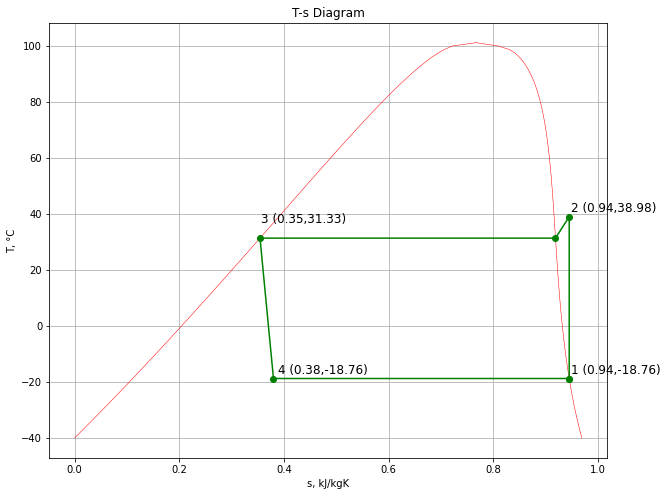

In [2]:
"""
T-s Diagram
"""
from phyprops.prop_coolprop import *

import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10.0, 8.0))  # figsize :set figure size
plt.title("T-s Diagram")
plt.xlabel("s, kJ/kgK")
plt.ylabel("T, °C")
plt.grid()

tcp = tc(refrigerant)
T = np.linspace(-40, tcp,120)
for x in np.array([0, 1.0]):
    S=np.array([tx_s(t,x, refrigerant) for t in T])
    plt.plot(S, T, 'r', lw=0.5)

# cycle
t2= ps_t(p2, s2,refrigerant)
s3=px_s(p2,0, refrigerant)
t4=t1
p4=p1
s4=ph_s(p4,h4, refrigerant)
ta=t3
sa=tx_s(ta,1, refrigerant)

t=[t1,t2,ta,t3,t4,t1]
s=[s1,s2,sa,s3,s4,s1]
plt.plot(s,t, 'g-o', lw=1.5)

plt.annotate('1 ({:.2f},{:.2f})'.format(s[0], t[0]),
                 xy=(s[0], t[0]), xycoords='data',
                 xytext=(+2, +5), textcoords='offset points', fontsize=12)

plt.annotate('2 ({:.2f},{:.2f})'.format(s[1], t[1]),
                 xy=(s[1], t[1]), xycoords='data',
                 xytext=(+2, +5), textcoords='offset points', fontsize=12)

plt.annotate('3 ({:.2f},{:.2f})'.format(s[3], t[3]),
                 xy=(s[3], t[3]), xycoords='data',
                 xytext=(+1, +15), textcoords='offset points', fontsize=12)

plt.annotate('4 ({:.2f},{:.2f})'.format(s[4], t[4]),
                 xy=(s[4], t[4]), xycoords='data',
                 xytext=(+5, +5), textcoords='offset points', fontsize=12)

plt.show()